In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse

from functions.eval import *
from functions.cbi import *
from functions.utils import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
nruns = 10
imputer = MissForest(criterion = ('mse', 'gini'), random_state = 0)
missing_rates = np.arange(1, 5)*0.2
test_size = 0.4

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data',
                  sep = ",", header = None)
print(data.head())
data = data.to_numpy()
X,y = data[:, [x for x in range(data.shape[1]) if x != 6]].astype(np.float32),data[:,-1]
G = len(np.unique(y))
le2 = LabelEncoder()
y = le2.fit_transform(y)
for g in range(G):
  print(sum(y==g))

X.shape

    0   1   2   3   4    5  6
0  85  92  45  27  31  0.0  1
1  85  64  59  32  23  0.0  2
2  86  54  33  16  54  0.0  2
3  91  78  34  24  36  0.0  2
4  87  70  12  28  10  0.0  2
145
200


(345, 6)

In [4]:
def one_run(X, y, imputer = MissForest(), missing_rate = 0.8, cat_vars = None):
     
    X_missing = introduce_missing_data(X.copy(), missing_rate)
    
    scaler = MinMaxScaler()
    scaler.fit(X_missing)
    X_missing = scaler.transform(X_missing)
    X = scaler.transform(X)

    X_cbi, _ = cbi_train(X_missing, y, cat_vars, imputer)
    
    X_imputed = imputer.fit_transform(X_missing, cat_vars = cat_vars)
    
    return mse(X, X_cbi), mse(X,X_imputed)

In [5]:
res_all = []
for missing_rate in missing_rates:
    res = np.array([one_run(X, y, imputer = imputer,  missing_rate = missing_rate) for i in range(nruns)])
    res = np.array([np.mean(res, axis = 0)]).flatten().round(3)
    print("result at missing rate", missing_rate, "\n", res)
    res_all.append(res)   

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6

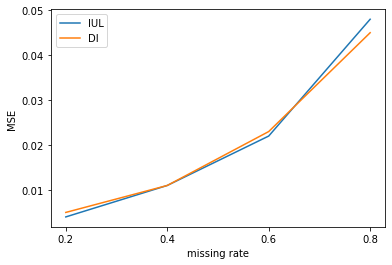

In [9]:
from matplotlib import pyplot as plt
df = pd.DataFrame(np.asarray(res_all), columns = ['IUL', 'DI'], index = missing_rates)
plot = df.plot()
plot.set_xlabel("missing rate")
plot.set_ylabel("MSE")
plt.xticks(missing_rates)
plot.get_figure().savefig("mse_liver.png",dpi=1000)

In [7]:
df

,IUL,DI
0.2,0.004,0.005
0.4,0.011,0.011
0.6,0.022,0.023
0.8,0.048,0.045
